<font size='8'>Salary Prediction</font>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size='4'>Read data</font>

In [ ]:
FILE_NAME = "Salary_Data.csv"
df = pd.read_csv(FILE_NAME, delimiter=',')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


<font size='4'>Save a copy data</font>

In [ ]:
df_raw = df[df['Age'] > 30]
print(df_raw._is_view)

False


<font size='6'>Data Cleansing</font>

<font size='4'>Rename columns</font>

In [ ]:
print(df.columns)
def cleaning_rename_cols(df):
    df.columns = [col.replace(' ', '_').lower() for col in df.columns]
    print('rename column - Successful ...')

cleaning_rename_cols(df)
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')
rename column - Successful ...
Index(['age', 'gender', 'education_level', 'job_title', 'years_of_experience',
       'salary'],
      dtype='object')


<font size='4'>Check columns values</font>

In [ ]:
for col in df.columns:
    # print(f"{col}:\n{df[col].info()}", end='\n\n')
    print(f"{col}:\n"
          f"null: {df[col].isnull().any()}\n"
          f"NaN:  {df[col].isna().any()}", end='\n\n')

age:
null: True
NaN:  True

gender:
null: True
NaN:  True

education_level:
null: True
NaN:  True

job_title:
null: True
NaN:  True

years_of_experience:
null: True
NaN:  True

salary:
null: True
NaN:  True



<font size='3'>remove Target column missing value rows</font>

In [ ]:
# df = df.dropna(subset=['salary']).reset_index()          # create index column, keep all index
def cleaning_nan_salary(df) -> pd.DataFrame:
    return df.dropna(subset=['salary']).reset_index(drop=True)

df = cleaning_nan_salary(df)
# cleaning_nan_salary(df)
print(df['salary'].isna().any())
print(df['salary'].isnull().any())


False
False


<font size='3'>check Target column outliner, and address it</font>

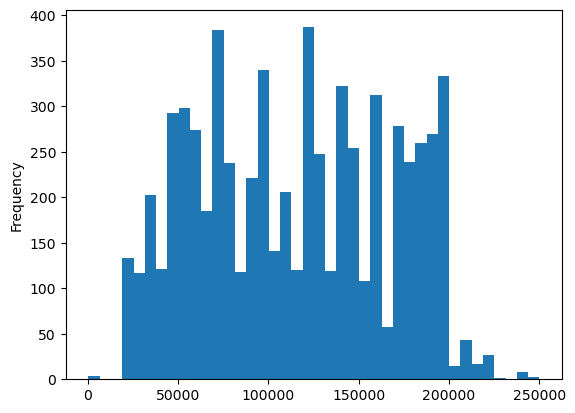

In [ ]:
# plt.hist(df['salary'], bins=32)
# sns.violinplot(x=df['salary'])
df['salary'].plot(kind='hist', bins=40)
plt.show()

<font size='3'>check minimum, remove unreasonable data</font>

In [ ]:
print(df.sort_values(by=['salary']).head(10), end='\n\n')

def cleaning_remove_salary_outlier(df, lower_bound=10000) -> pd.DataFrame:
    df['salary'] = df['salary'].astype('int32')
    df = df[df['salary'] > lower_bound]
    return df

df = cleaning_remove_salary_outlier(df)
print(df.sort_values(by=['salary']).head(10))

       age  gender    education_level                           job_title  \
258   29.0    Male         Bachelor's  Junior Business Operations Analyst   
4630  31.0  Female  Bachelor's Degree               Junior HR Coordinator   
1888  25.0  Female  Bachelor's Degree                 Front end Developer   
2652  23.0    Male                PhD           Software Engineer Manager   
4920  21.0  Female        High School         Junior Sales Representative   
4933  21.0  Female        High School         Junior Sales Representative   
4946  21.0  Female        High School         Junior Sales Representative   
4959  21.0  Female        High School         Junior Sales Representative   
4972  21.0  Female        High School         Junior Sales Representative   
4985  21.0  Female        High School         Junior Sales Representative   

      years_of_experience   salary  
258                   1.5    350.0  
4630                  4.0    500.0  
1888                  1.0    550.0  
2652

<font size='3'>check maximum, remove unreasonable data</font>

In [ ]:
print(df.sort_values(by=['salary']).tail(10), end='\n\n')

# def remove_outlier_upper(df, col, upper_bound=10000):
#     return df[df[col] < upper_bound]


# df = remove_outlier_lower(df, 'salary')
# print(df.sort_values(by=['salary']).tail(10))

       age gender    education_level                 job_title  \
4288  51.0   Male                PhD            Data Scientist   
4378  51.0   Male                PhD            Data Scientist   
4348  51.0   Male                PhD            Data Scientist   
4303  51.0   Male                PhD            Data Scientist   
4363  51.0   Male                PhD            Data Scientist   
4333  51.0   Male                PhD            Data Scientist   
4273  51.0   Male                PhD            Data Scientist   
4998  45.0   Male  Bachelor's Degree         Financial Manager   
30    50.0   Male         Bachelor's                       CEO   
83    52.0   Male                PhD  Chief Technology Officer   

      years_of_experience  salary  
4288                 24.0  240000  
4378                 24.0  240000  
4348                 24.0  240000  
4303                 24.0  240000  
4363                 24.0  240000  
4333                 24.0  240000  
4273                 

In [ ]:
def cleaning_salary(df):
    df = cleaning_nan_salary(df)
    print("cleaning nan salary - Successful ...")
    df = cleaning_remove_salary_outlier(df)
    print("cleaning salary outlier - Successful ...")
    return df

df = cleaning_salary(df)
df

cleaning nan salary - Successful ...
cleaning salary outlier - Successful ...


,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000
1,28.0,Female,Master's,Data Analyst,3.0,65000
2,45.0,Male,PhD,Senior Manager,15.0,150000
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000
4,52.0,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...
6690,49.0,Female,PhD,Director of Marketing,20.0,200000
6691,32.0,Male,High School,Sales Associate,3.0,50000
6692,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000
6693,46.0,Male,Master's Degree,Marketing Manager,14.0,140000


In [ ]:
# def remove_outlier(df, col, t_fac=2.5):
#     ## version 1
#     # mean_ = df[col].mean()
#     # std_ = df[col].std()
#     # upper_bound = mean_ + t_fac * std_
#     # lower_bound = mean_ - t_fac * std_


#     ## version 2
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     IQR = t_fac * (q3 - q1)
#     upper_bound, lower_bound = q3 + IQR, q1 - IQR

#     return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# df = remove_outlier(df, 'salary', t_fac=0.7)

# df['salary'].plot(kind='hist', bins=40)
# plt.show()

<font size='4'>Check again columns values</font>

In [ ]:
for col in df.columns:
    print(f"{col}:\n"
          f"null: {df[col].isnull().any()}\n"
          f"NaN: {df[col].isna().any()}", end='\n\n')

age:
null: False
NaN: False

gender:
null: False
NaN: False

education_level:
null: True
NaN: True

job_title:
null: False
NaN: False

years_of_experience:
null: False
NaN: False

salary:
null: False
NaN: False



<font size='4'>Check each feature(column)</font>

<font size='3'>feature: age</font>

In [ ]:
df['age'].unique() # no NaN

def cleaning_age(df):
    # df.loc[:, 'age'] = df['age'].astype('int32')
    df['age'] = df['age'].astype('int32')
    print('cleaning age - Successful ...')

cleaning_age(df)
df['age'].unique()

cleaning age - Successful ...


array([32, 28, 45, 36, 52, 29, 42, 31, 26, 38, 48, 35, 40, 27, 44, 33, 39,
       25, 51, 34, 47, 30, 41, 37, 24, 43, 50, 46, 49, 23, 53, 61, 57, 62,
       55, 56, 54, 60, 58, 22, 21], dtype=int32)

<font size='3'>feature: gender</font>

In [ ]:
df['gender'].unique() # no NaN


def cleaning_gender(df):
    mapping = {'Male': 'male', 'Female': 'female', 'Other': 'other'}
    # df.loc[:, 'gender'] = df['gender'].map(mapping).fillna(df['gender'])
    df['gender'] = df['gender'].map(mapping).fillna(df['gender'])
    print('cleaning gender - Successful ...')

cleaning_gender(df)
df['gender'].unique()

cleaning gender - Successful ...


array(['male', 'female', 'other'], dtype=object)

<font size='3'>feature: education_level</font>

In [ ]:
df['education_level'].unique()

def cleaning_edu(df):
    el_str = df['education_level'].str.lower()
    # df.loc[:, 'education_level'] = np.select(
    df['education_level'] = np.select(
        condlist=[
            el_str.str.contains('bachelor', na=False),
            el_str.str.contains('master', na=False),
            el_str.str.contains('phd', na=False),
            el_str.str.contains('high school', na=False),
        ],
        choicelist=[
            'Bachelor',
            'Master',
            'PhD',
            'High School'
        ],
        default='No Specified',
    ).astype('str')
    print('cleaning education level - Successful ...')


cleaning_edu(df)
df['education_level'].unique()

cleaning education level - Successful ...


array(['Bachelor', 'Master', 'PhD', 'No Specified', 'High School'],
      dtype=object)

<font size='3'>feature: job_title</font>

In [ ]:
df['job_title'].unique()

def cleaning_job(df):
    df.loc[:, 'job_title'] = (
        df['job_title']
        # .str
        # .replace(r'\b(Junior|Juniour|Senior)\b\s+', '', regex=True)
        .str.strip()
        .astype('str')
    )
    print('cleaning job title - Successful ...')

cleaning_job(df)
df['job_title'].unique()

cleaning job title - Successful ...


array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

<font size='3'>feature: years_of_experience</font>

In [ ]:
df['years_of_experience'].unique()

def cleaning_exp(df):
    # df.loc[:, 'years_of_experience'] = df['years_of_experience'].astype('float32')
    df['years_of_experience'] = df['years_of_experience'].astype('float32')
    print('cleaning years of experience - Successful ...')

cleaning_exp(df)
df['years_of_experience'].unique()

cleaning years of experience - Successful ...


array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5, 31. , 30. , 28. , 33. , 27. ,
       34. , 29. , 26. , 32. ], dtype=float32)

In [ ]:
def data_cleaning(df, has_target=False):
    cleaning_rename_cols(df)
    if has_target:
        df = cleaning_salary(df)
    cleaning_age(df)
    cleaning_gender(df)
    cleaning_edu(df)
    cleaning_job(df)
    cleaning_exp(df)

    print("... Finishing Cleaning Process ...")

data_cleaning(df, has_target=True)

rename column - Successful ...
cleaning nan salary - Successful ...
cleaning salary outlier - Successful ...
cleaning age - Successful ...
cleaning gender - Successful ...
cleaning education level - Successful ...
cleaning job title - Successful ...
cleaning years of experience - Successful ...
... Finishing Cleaning Process ...


<font size='6'>Data Visualization</font>

In [ ]:
df

,age,gender,education_level,job_title,years_of_experience,salary
0,32,male,Bachelor,Software Engineer,5.0,90000
1,28,female,Master,Data Analyst,3.0,65000
2,45,male,PhD,Senior Manager,15.0,150000
3,36,female,Bachelor,Sales Associate,7.0,60000
4,52,male,Master,Director,20.0,200000
...,...,...,...,...,...,...
6690,49,female,PhD,Director of Marketing,20.0,200000
6691,32,male,High School,Sales Associate,3.0,50000
6692,30,female,Bachelor,Financial Manager,4.0,55000
6693,46,male,Master,Marketing Manager,14.0,140000


In [ ]:
gen_ord = ['female', 'male', 'other']
df['gender'] = pd.Categorical(df['gender'], categories=gen_ord, ordered=True)

edu_ord = ['No Specified', 'High School', 'Bachelor', 'Master', 'PhD']
df['education_level'] = pd.Categorical(df['education_level'], categories=edu_ord, ordered=True)

## set save images file
images_dir = os.path.join(os.getcwd(), 'images')
os.makedirs(images_dir, exist_ok=True)

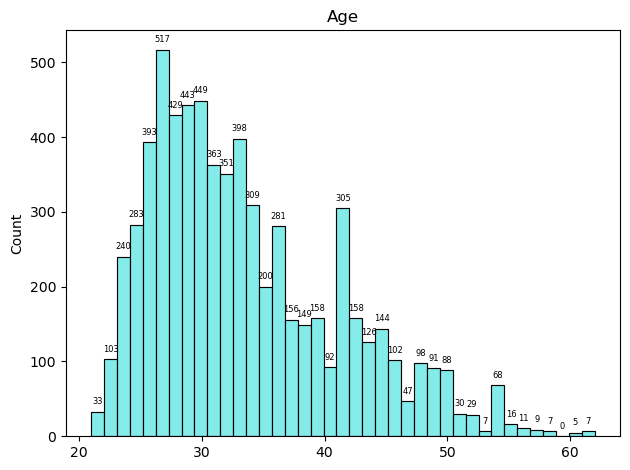

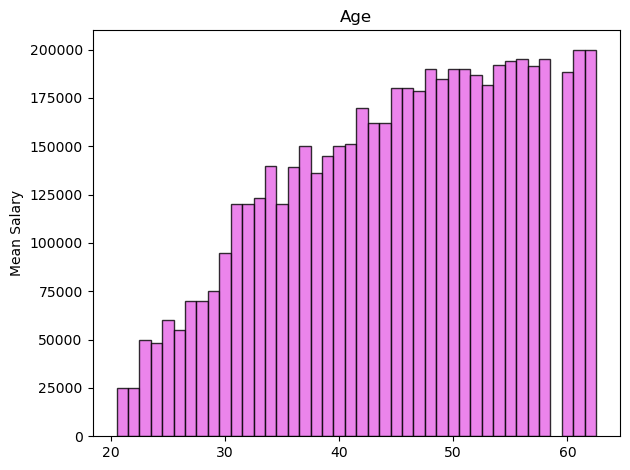

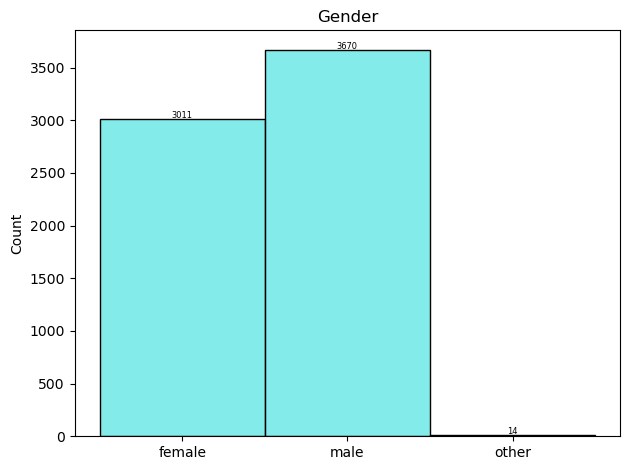

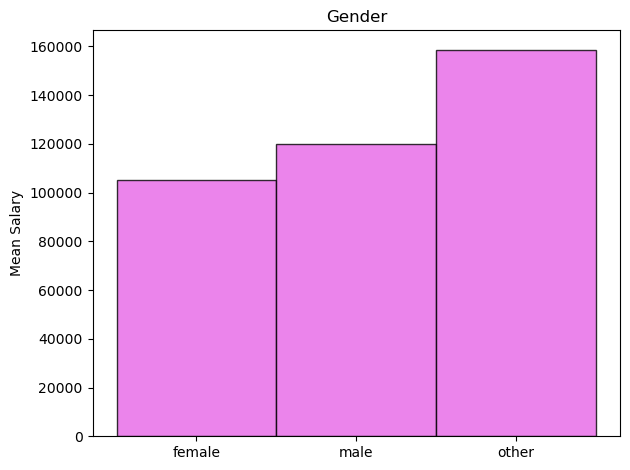

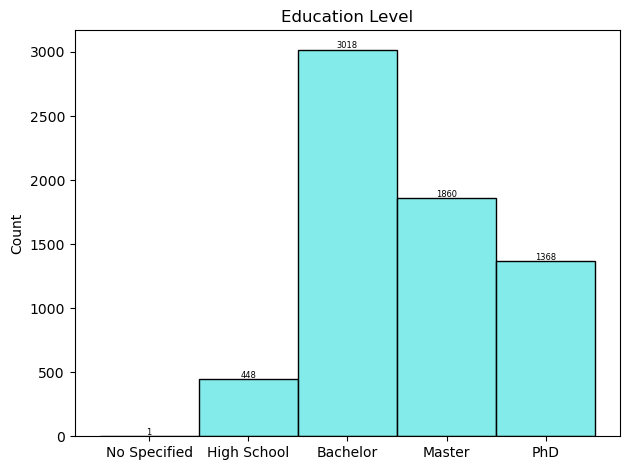

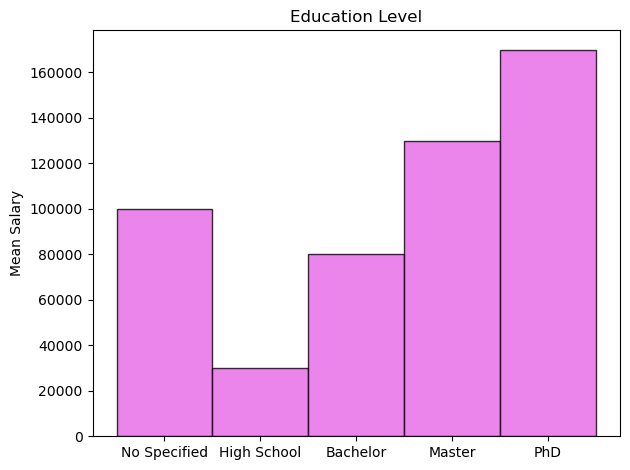

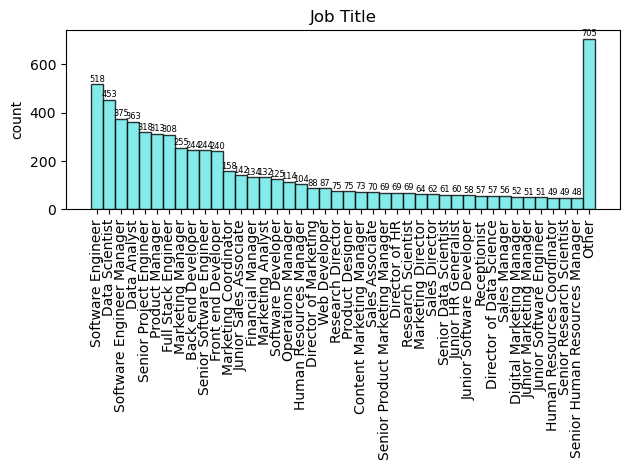

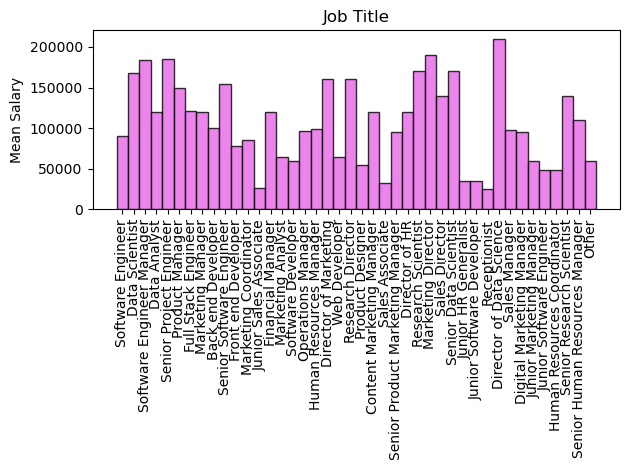

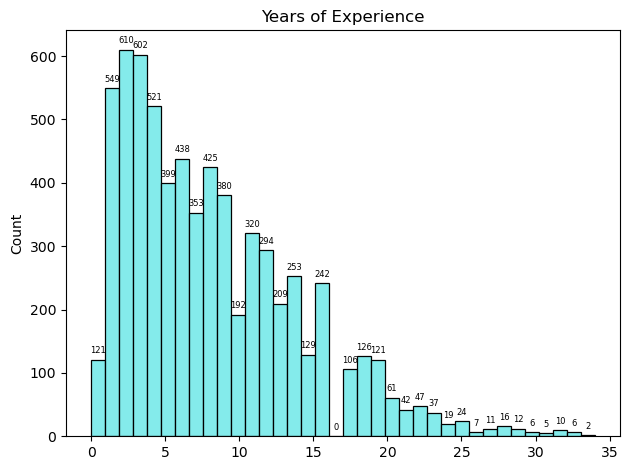

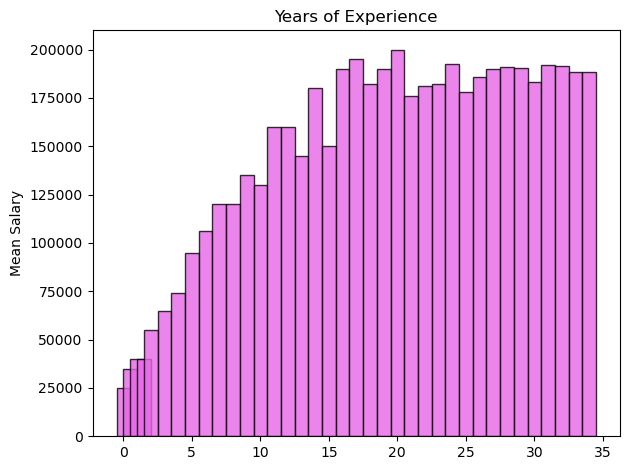

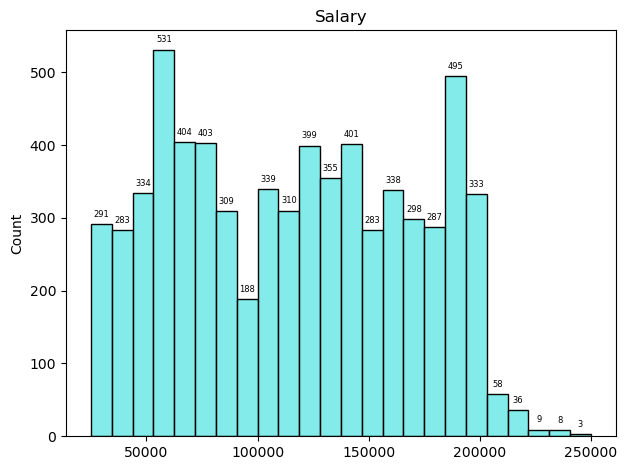

In [ ]:
def show_plot(df, col):
    title_ = col

    ## show distribution
    if col == 'job_title':
        plt.xticks(rotation=90)

        ## group jobs that less than 45
        threshold = 45
        agg_job = df[col].value_counts()
        valid_job = agg_job[agg_job > threshold]
        valid_job.loc['Other'] = agg_job[agg_job <= threshold].sum()

        ## plot barplot
        bars = sns.barplot(data=valid_job,
                           color=(0.4, 0.9, 0.9),
                           edgecolor='black',
                           saturation=1,
                           alpha=0.8,
                           width=1)
        bars.margins(x=0.05)

    else :
        ## plot histgram
        bars = sns.histplot(data=df,
                            x=col,
                            color=(0.4, 0.9, 0.9),
                            alpha=0.8)

    ## indicate number on bar
    for bar in bars.patches:
        bbox = bar.get_bbox()
        x0 = bbox.x0
        width = bbox.width
        height = bbox.y1 - bbox.y0
        x_position = x0 + width / 2
        bars.text(x=x_position, y=height + 10,
                  s=f"{int(height)}",
                  ha='center',
                  fontsize=6)

    if '_' not in title_:
        title_ = title_[0].upper() + title_[1:]
    else :
        title_ = " ".join([n_split.capitalize()
                           if n_split != 'of'
                           else n_split
                           for n_split in title_.split('_')])

    plt.xlabel('')
    plt.title(title_)
    plt.tight_layout()

    ## save image
    fig_fname = f'{col}_distribution.png'
    plt.savefig(os.path.join(images_dir, fig_fname),
                bbox_inches='tight')

    ## plot image
    plt.show()

    if col == 'salary':
        return

    ## get feature mean|median|mode with target feature
    ## mode
    # d = (df
    #      .groupby([col], observed=False)['salary']
    #      .agg(lambda x: pd.Series.mode(x)[0]))
    ## quantile
    d = df.groupby([col], observed=False)['salary'].quantile(0.5)

    if col == 'job_title':
        plt.xticks(rotation=90)
        agg_job = df[col].value_counts()

        ## get job title that exceed threshold
        valid_job_index = agg_job[agg_job > threshold].index

        temp_ = df[[col, 'salary']].copy()
        ## create a df, remain jobs exceed threshold,
        ## set the rest jobs 
        temp_[col] = temp_[col].where(
            temp_[col].isin(valid_job_index), other='Other')
        
        ## mode
        # d = (temp_
        #      .groupby([col])['salary']
        #      .agg(lambda x: pd.Series.mode(x)[0]))
        ## quantile
        d = temp_.groupby([col], observed=False)['salary'].quantile(0.5)

        valid_job_index = list(valid_job_index) + ['Other']
        d = d.reindex(valid_job_index)

    plt.bar(d.index, d.values, width=1, color=(0.9, 0.4, 0.9),
            edgecolor='black', alpha=0.8)

    plt.xlabel('')
    plt.ylabel('Mean Salary')
    plt.title(title_)
    plt.tight_layout()

    ## save image
    fig_fname = f'{col}_salary_relation.png'
    plt.savefig(os.path.join(images_dir, fig_fname),
                bbox_inches='tight')

    ## plot image
    plt.show()




for col in df.columns:
    show_plot(df, col)

In [ ]:
df_cleaned = df.copy()
df_cleaned

,age,gender,education_level,job_title,years_of_experience,salary
0,32,male,Bachelor,Software Engineer,5.0,90000
1,28,female,Master,Data Analyst,3.0,65000
2,45,male,PhD,Senior Manager,15.0,150000
3,36,female,Bachelor,Sales Associate,7.0,60000
4,52,male,Master,Director,20.0,200000
...,...,...,...,...,...,...
6690,49,female,PhD,Director of Marketing,20.0,200000
6691,32,male,High School,Sales Associate,3.0,50000
6692,30,female,Bachelor,Financial Manager,4.0,55000
6693,46,male,Master,Marketing Manager,14.0,140000


<font size='6'>Data Spliting</font>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [ ]:
# train set size = 0.8
# test set size  = 0.2

X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train
# y_train
X_test
# y_test

,age,gender,education_level,job_title,years_of_experience
6565,36,male,Bachelor,Sales Director,6.0
1514,54,male,PhD,Software Engineer Manager,17.0
6237,29,male,Bachelor,Marketing Analyst,4.0
5460,26,female,Bachelor,Social Media Manager,3.0
5314,28,male,Bachelor,Product Designer,3.0
...,...,...,...,...,...
4473,41,male,PhD,Data Scientist,15.0
6617,28,male,PhD,Marketing Manager,4.0
1036,25,female,Bachelor,Data Analyst,2.0
2008,31,female,Bachelor,Front end Developer,6.0


<font size='6'>Data Preprocessing</font>

In [ ]:
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)
from category_encoders import TargetEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')


<font size='4' color='lightblue'>No Polynomial</font>

In [ ]:
numeric_cols = ['age', 'years_of_experience']
onehot_cols = ['gender']
ord_cols = ['education_level']
ord_order = ['No Specified', 'High School', 'Bachelor', 'Master', 'PhD']
tar_cols = ['job_title']

In [ ]:
numeric_pipe = Pipeline([
    ('scaler', StandardScaler()),
])

onehot_pipe = Pipeline([
    ('one-hot', OneHotEncoder(sparse_output=False,
                              handle_unknown='ignore'))
])

ordinal_pipe = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[ord_order]))
])

target_pipe = Pipeline([
    ('tra_encode', TargetEncoder(cols=tar_cols)),
    ('tar_scaler', StandardScaler()),
])

set_config(transform_output='pandas')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, numeric_cols),
        ('cat_1', onehot_pipe, onehot_cols),
        ('cat_2', ordinal_pipe, ord_cols),
        ('tar', target_pipe, tar_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
)

X_train_ = preprocessor.fit_transform(X_train, y_train)
X_train_

X_test_ = preprocessor.transform(X_test)
X_test_



,age,years_of_experience,gender_female,gender_male,gender_other,education_level,job_title
6565,0.303821,-0.346411,0.0,1.0,0.0,2.0,0.083906
1514,2.651778,1.451595,0.0,1.0,0.0,4.0,1.393586
6237,-0.609273,-0.673322,0.0,1.0,0.0,2.0,-1.357287
5460,-1.000600,-0.836777,1.0,0.0,0.0,2.0,-0.488397
5314,-0.739716,-0.836777,0.0,1.0,0.0,2.0,-1.508020
...,...,...,...,...,...,...,...
4473,0.956031,1.124685,0.0,1.0,0.0,4.0,1.224235
6617,-0.739716,-0.673322,0.0,1.0,0.0,4.0,0.087862
1036,-1.131042,-1.000232,1.0,0.0,0.0,2.0,0.146082
2008,-0.348389,-0.346411,1.0,0.0,0.0,2.0,-0.804410


<font size='4' color='lightblue'>Polynomial</font>

In [ ]:
poly_cols = X_train_.columns.difference([
    'gender_female',
    'gender_male',
    'gender_other'
])
poly_cols

Index(['age', 'education_level', 'job_title', 'years_of_experience'], dtype='object')

In [ ]:
poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),

])

poly_transformer = ColumnTransformer(
    transformers=[
        ('num_poly', poly_pipe, poly_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
)

X_train_poly = poly_transformer.fit_transform(X_train_, y_train)
X_train_poly
X_test_poly = poly_transformer.transform(X_test_)
X_test_poly

,age,education_level,job_title,years_of_experience,age^2,age education_level,age job_title,age years_of_experience,education_level^2,education_level job_title,education_level years_of_experience,job_title^2,job_title years_of_experience,years_of_experience^2,gender_female,gender_male,gender_other
6565,0.303821,-0.699771,0.083906,-0.346411,-0.619346,0.027741,-0.551329,-0.742964,-0.747884,-0.164711,-0.416088,-0.830339,-0.692498,-0.530476,0.0,1.0,0.0
1514,2.651778,1.562132,1.393586,1.451595,4.115763,3.268850,3.175119,2.073980,1.717901,1.863763,1.794979,0.787793,1.438068,0.667393,0.0,1.0,0.0
6237,-0.609273,-0.699771,-1.357287,-0.673322,-0.429039,-0.564179,0.262468,-0.375770,-0.747884,-1.246152,-0.638522,0.704294,0.286568,-0.329521,0.0,1.0,0.0
5460,-1.000600,-0.699771,-0.488397,-0.836777,0.000819,-0.817858,-0.081005,-0.071576,-0.747884,-0.594155,-0.749739,-0.636760,-0.237990,-0.180727,1.0,0.0,0.0
5314,-0.739716,-0.699771,-1.508020,-0.836777,-0.308973,-0.648739,0.555454,-0.227078,-0.747884,-1.359259,-0.749739,1.065456,0.647879,-0.180727,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,0.956031,1.562132,1.224235,1.124685,-0.058683,1.070293,0.611200,0.097927,1.717901,1.609609,1.350112,0.417069,0.767285,0.159695,0.0,1.0,0.0
6617,-0.739716,1.562132,0.087862,-0.673322,-0.308973,-1.128264,-0.643205,-0.313206,1.717901,-0.095813,-1.096658,-0.829771,-0.723744,-0.329521,0.0,1.0,0.0
1036,-1.131042,-0.699771,0.146082,-1.000232,0.190544,-0.902418,-0.744979,0.137867,-0.747884,-0.118056,-0.860956,-0.818381,-0.814030,0.000280,1.0,0.0,0.0
2008,-0.348389,-0.699771,-0.804410,-0.346411,-0.599512,-0.395059,-0.292654,-0.582025,-0.747884,-0.831285,-0.416088,-0.295125,-0.372992,-0.530476,1.0,0.0,0.0


<font size='4'>Show heatmap in all features</font>

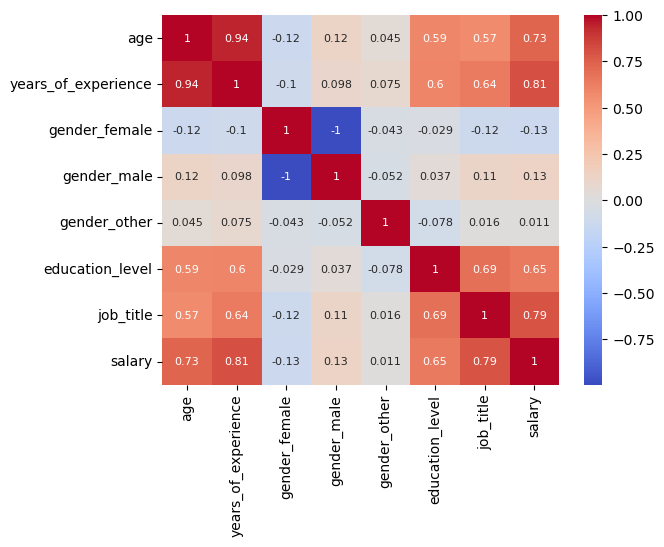

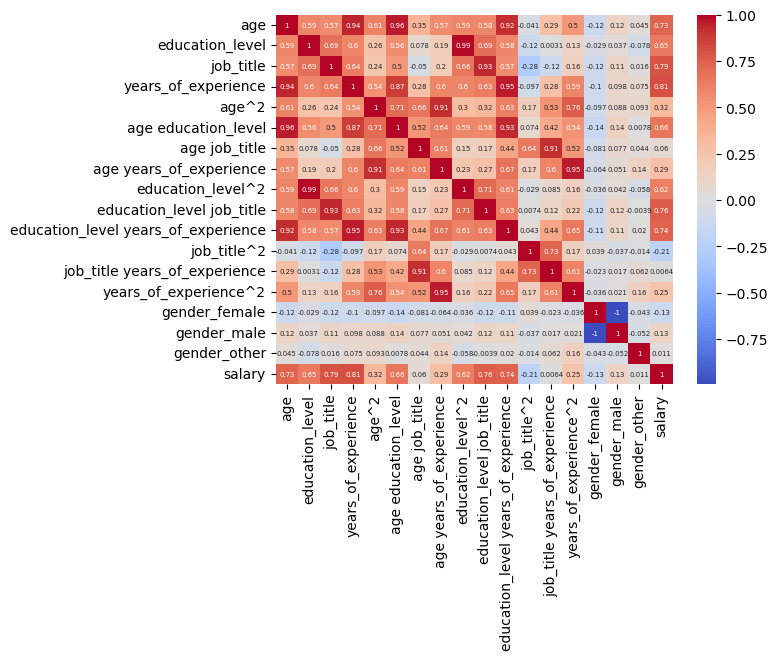

In [202]:
heatmap_df = X_train_.copy()
heatmap_df['salary'] = y_train
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 8})

## save fig
plt.savefig(os.path.join(images_dir, 'features_heatmap.png'),
            bbox_inches='tight')
## show fig
plt.show()


heatmap_poly_df = X_train_poly.copy()
heatmap_poly_df['salary'] = y_train
sns.heatmap(heatmap_poly_df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 5})
## save fig
plt.savefig(os.path.join(images_dir, 'poly_features_heatmap.png'),
            bbox_inches='tight')
## show fig
plt.show()

<font size='6'>Training</font>

In [142]:
from skopt import BayesSearchCV
from skopt.space import (
    Real,
    Integer,
    Categorical
)

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error
)

In [207]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_, y_train)
y_pred_ols = linear_model.predict(X_test_)
print(f'mae: {mean_absolute_error(y_test, y_pred_ols):.2f}', end='\n\n')


linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly, y_train)
y_pred_ols_poly = linear_model_poly.predict(X_test_poly)
print(f'mae: {mean_absolute_error(y_test, y_pred_ols_poly):.2f}')

mae: 17954.64

mae: 16027.68


In [205]:
from sklearn.linear_model import Ridge

params_space = {
    'alpha': Real(low=1e-3, high=1e+2, prior='log-uniform'),
}

common_params = {
    'n_iter': 30,
    'cv': 3,
    'n_jobs': -1,
    'scoring': 'neg_mean_squared_error',
    'random_state': 423,
    'verbose': 0,
}

ridge_model = BayesSearchCV(
    estimator=Ridge(),
    search_spaces=params_space,
    **common_params,
)
ridge_model.fit(X_train_, y_train)
y_pred_r = ridge_model.predict(X_test_)
print(f'mae: {mean_absolute_error(y_test, y_pred_r):8.2f}')
print(f'alpha: {ridge_model.best_params_.get('alpha'):5.2f}', end='\n\n')

ridge_model_poly = BayesSearchCV(
    estimator=Ridge(),
    search_spaces=params_space,
    **common_params,
)
ridge_model_poly.fit(X_train_poly, y_train)
y_pred_r_poly = ridge_model_poly.predict(X_test_poly)
print(f'mae: {mean_absolute_error(y_test, y_pred_r_poly):8.2f}')
print(f'alpha: {ridge_model_poly.best_params_.get('alpha'):5.2f}')

mae: 17947.19
alpha:  2.17

mae: 16027.81
alpha:  0.00


In [ ]:
from sklearn.linear_model import Lasso

params_space = {
    'alpha': Real(low=1e-3, high=1e+2, prior='log-uniform'),
    'selection': Categorical(['cyclic', 'random']),
}

common_params = {
    'n_iter': 30,
    'cv': 3,
    'n_jobs': -1,
    'scoring': 'neg_mean_squared_error',
    'verbose': 0,
    'random_state': 243,
}

lasso_model = BayesSearchCV(
    estimator=Lasso(max_iter=int(1e+5)),
    search_spaces=params_space,
    **common_params,
)

lasso_model.fit(X_train_, y_train)
y_pred_la = lasso_model.predict(X_test_)
print(f'mae: {mean_absolute_error(y_test, y_pred_la):.2f}')
print(f'alpha = {lasso_model.best_params_.get('alpha'):.4f}')
print(f'selection = {lasso_model.best_params_.get('selection')}', end='\n\n')


lasso_model_poly = BayesSearchCV(
    estimator=Lasso(max_iter=int(1e+5)),
    search_spaces=params_space,
    **common_params,
)
lasso_model_poly.fit(X_train_poly, y_train)
y_pred_la_poly = lasso_model_poly.predict(X_test_poly)
print(f'mae: {mean_absolute_error(y_test, y_pred_la_poly):.2f}')
print(f'alpha = {lasso_model_poly.best_params_.get('alpha'):.4f}')
print(f'selection = {lasso_model_poly.best_params_.get('selection')}')

mae: 17944.37
alpha = 11.4612
selection = cyclic



/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+11, tolerance: 1.014e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e+11, tolerance: 9.786e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

mae: 16035.98
alpha = 1.3107
selection = cyclic



In [ ]:
# import inspect
# sig = inspect.signature([class])
# print(sig.parameters)

In [ ]:
from sklearn.linear_model import ElasticNet

params_space = {
    'alpha': Real(low=1e-3, high=1e+2, prior='log-uniform'),
    'l1_ratio': Real(low=0.01, high=0.99),
    'selection': Categorical(['cyclic', 'random']),
}

common_params = {
    'n_iter': 30,
    'cv': 3,
    'n_jobs': -1,
    'scoring': 'neg_mean_squared_error',
    'random_state': 423,
    'verbose': 0,
}

elastic_model = BayesSearchCV(
    estimator=ElasticNet(max_iter=int(1e+6)),
    search_spaces=params_space,
    **common_params,
)

elastic_model.fit(X_train_, y_train)
y_pred_e = elastic_model.predict(X_test_)
print(f'mae: {mean_absolute_error(y_test, y_pred_e):.2f}')
print(f'alpha: {elastic_model.best_params_.get('alpha'):.4f}')
print(f'l1_ratio: {elastic_model.best_params_.get('l1_ratio'):.2f}')
print(f'selection = {elastic_model.best_params_.get('selection')}', end='\n\n')


elastic_model_poly = BayesSearchCV(
    estimator=ElasticNet(max_iter=int(1e+6)),
    search_spaces=params_space,
    **common_params,
)

elastic_model_poly.fit(X_train_poly, y_train)
y_pred_e_poly = elastic_model_poly.predict(X_test_poly)
print(f'mae: {mean_absolute_error(y_test, y_pred_e_poly):.2f}')
print(f'alpha: {elastic_model_poly.best_params_.get('alpha'):.4f}')
print(f'l1_ratio: {elastic_model_poly.best_params_.get('l1_ratio'):.2f}')
print(f'selection = {elastic_model_poly.best_params_.get('selection')}')

mae: 17945.20
alpha: 0.0015
l1_ratio: 0.64
selection = random

mae: 16030.85
alpha: 0.0010
l1_ratio: 0.99
selection = random


In [125]:
from sklearn.linear_model import SGDRegressor

params_space = [
    {
        'penalty': Categorical(['elasticnet']),
        'alpha': Real(1e-5, 1e+2, prior='log-uniform'),
        'l1_ratio': Real(0.01, 0.99),
        'learning_rate': Categorical(['adaptive', 'constant', 'invscaling']),
        'eta0': Real(1e-5, 1, prior='log-uniform'),
    },
    {
        'penalty': Categorical(['l1']),
        'alpha': Real(1e-5, 1e+2, prior='log-uniform'),
        'learning_rate': Categorical(['adaptive', 'constant', 'invscaling']),
        'eta0': Real(1e-5, 1, prior='log-uniform'),
    },
    {
        'penalty': Categorical(['l2']),
        'alpha': Real(1e-5, 1e+2, prior='log-uniform'),
        'learning_rate': Categorical(['adaptive', 'constant', 'invscaling']),
        'eta0': Real(1e-5, 1, prior='log-uniform'),
    },
]

common_params = {
    'n_iter': 30,
    'cv': 3,
    'n_jobs': -1,
    'scoring': 'neg_mean_squared_error',
    'random_state': 423,
    'verbose': 0,
}

SGD_model = BayesSearchCV(
    estimator=SGDRegressor(max_iter=int(1e+6), early_stopping=True),
    search_spaces=params_space,
    **common_params,
)
SGD_model.fit(X_train_, y_train)
y_pred_sgd = SGD_model.predict(X_test_)
print(f'mae: {mean_absolute_error(y_test, y_pred_sgd):.2f}')
print(f'penalty: {SGD_model.best_params_.get('penalty')}')
print(f'alpha: {SGD_model.best_params_.get('alpha'):.5f}')
l1_ratio = SGD_model.best_params_.get('l1_ratio', -1)
if l1_ratio != -1:
    print(f'l1_ratio: {l1_ratio:.2f}')
print(f'learning_rate: {SGD_model.best_params_.get('learning_rate')}')
print(f'eta0: {SGD_model.best_params_.get('eta0'):.5f}', end='\n\n')


SGD_model_poly = BayesSearchCV(
    estimator=SGDRegressor(max_iter=int(1e+6), early_stopping=True),
    search_spaces=params_space,
    **common_params,
)
SGD_model_poly.fit(X_train_poly, y_train)
y_pred_sgd_poly = SGD_model_poly.predict(X_test_poly)
print(f'mae: {mean_absolute_error(y_test, y_pred_sgd_poly):.2f}')
print(f'penalty: {SGD_model_poly.best_params_.get('penalty')}')
print(f'alpha: {SGD_model_poly.best_params_.get('alpha'):.5f}')
l1_ratio = SGD_model_poly.best_params_.get('l1_ratio', -1)
if l1_ratio != -1:
    print(f'l1_ratio: {l1_ratio:.2f}')
print(f'learning_rate: {SGD_model_poly.best_params_.get('learning_rate')}')
print(f'eta0: {SGD_model_poly.best_params_.get('eta0'):.5f}')

mae: 17935.92
penalty: l1
alpha: 0.00005
learning_rate: adaptive
eta0: 0.00297

mae: 16632.44
penalty: l1
alpha: 0.00001
learning_rate: invscaling
eta0: 0.02871


In [157]:
# from sklearn.ensemble import RandomForestRegressor
# import inspect
# sig = inspect.signature(RandomForestRegressor)
# for i in sig.parameters.values():
#     print(i)

In [156]:
from sklearn.ensemble import RandomForestRegressor

params_space = {
    'n_estimators': Integer(100, 500),
    'criterion': Categorical(['squared_error', 'absolute_error', 'friedman_mse', 'poisson']),
    'max_depth': Integer(5, 30),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
}

common_params = {
    'n_iter': 30,
    'cv': 3,
    'scoring': 'neg_mean_squared_error',
    'n_jobs': -1,
    'random_state': 43,
    'verbose': 0,
}

rf_model = BayesSearchCV(
    estimator=RandomForestRegressor(),
    search_spaces=params_space,
    **common_params,
)

rf_model.fit(X_train_, y_train)
y_pred_rf = rf_model.predict(X_test_)
print(f'mae: {mean_absolute_error(y_test, y_pred_rf):.2f}')
print(f'n_estimators: {rf_model.best_params_.get('n_estimators')}')
print(f'criterion: {rf_model.best_params_.get('criterion')}')
print(f'max_depth: {rf_model.best_params_.get('max_depth')}')
print(f'min_samples_split: {rf_model.best_params_.get('min_samples_split')}')
print(f'min_samples_leaf: {rf_model.best_params_.get('min_samples_leaf')}')


rf_model_poly = BayesSearchCV(
    estimator=RandomForestRegressor(),
    search_spaces=params_space,
    **common_params,
)

rf_model_poly.fit(X_train_poly, y_train)
y_pred_rf_poly = rf_model_poly.predict(X_test_poly)
print(f'mae: {mean_absolute_error(y_test, y_pred_rf_poly):.2f}')
print(f'n_estimators: {rf_model_poly.best_params_.get('n_estimators')}')
print(f'criterion: {rf_model_poly.best_params_.get('criterion')}')
print(f'max_depth: {rf_model_poly.best_params_.get('max_depth')}')
print(f'min_samples_split: {rf_model_poly.best_params_.get('min_samples_split')}')
print(f'min_samples_leaf: {rf_model_poly.best_params_.get('min_samples_leaf')}')



mae: 3336.00
n_estimators: 500
criterion: friedman_mse
max_depth: 26
min_samples_split: 2
min_samples_leaf: 1


/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['friedman_mse', 30, 1, 2, 500] before, using random point ['squared_error', 14, 8, 4, 310]
  warnings.warn(
/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['friedman_mse', 30, 1, 2, 500] before, using random point ['poisson', 14, 6, 9, 174]
  warnings.warn(


mae: 3325.59
n_estimators: 500
criterion: friedman_mse
max_depth: 23
min_samples_split: 2
min_samples_leaf: 1


In [158]:
import xgboost as xgb
import inspect
sig = inspect.signature(xgb.XGBRFRegressor)
for i in sig.parameters.values():
    print(i)

learning_rate: float = 1.0
subsample: float = 0.8
colsample_bynode: float = 0.8
reg_lambda: float = 1e-05
**kwargs: Any


In [163]:
import xgboost as xgb

params_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(5, 30),
    'subsample': Real(0.9, 1),
    'colsample_bytree': Real(0.9, 1),
    'reg_lambda': Real(0, 10),
    'reg_alpha': Real(0, 10),
    'gamma': Integer(0, 5),
}

common_params = {
    'n_iter': 30,
    'cv': 3,
    'scoring': 'neg_mean_squared_error',
    'n_jobs': -1,
    'random_state': 43,
    'verbose': 0,
}

xgb_rf_model = BayesSearchCV(
    estimator=xgb.XGBRFRegressor(),
    search_spaces=params_space,
    **common_params,
)

xgb_rf_model.fit(X_train_, y_train)
y_pred_xgb_rf = xgb_rf_model.predict(X_test_)
print(f'mae: {mean_absolute_error(y_test, y_pred_xgb_rf):.2f}')
print(f'n_estimators: {xgb_rf_model.best_params_.get('n_estimators')}')
print(f'max_depth: {xgb_rf_model.best_params_.get('max_depth')}')
print(f'subsample: {xgb_rf_model.best_params_.get('subsample'):.2f}')
print(f'colsample_bytree: {xgb_rf_model.best_params_.get('colsample_bytree'):.2f}')
print(f'reg_lambda: {xgb_rf_model.best_params_.get('reg_lambda'):.2f}')
print(f'reg_alpha: {xgb_rf_model.best_params_.get('reg_alpha'):.2f}')
print(f'gamma: {xgb_rf_model.best_params_.get('gamma')}', end='\n\n')


xgb_rf_model_poly = BayesSearchCV(
    estimator=xgb.XGBRFRegressor(),
    search_spaces=params_space,
    **common_params,
)

xgb_rf_model_poly.fit(X_train_poly, y_train)
y_pred_xgb_rf_poly = xgb_rf_model_poly.predict(X_test_poly)
print(f'mae: {mean_absolute_error(y_test, y_pred_xgb_rf_poly):.2f}')
print(f'n_estimators: {xgb_rf_model_poly.best_params_.get('n_estimators')}')
print(f'max_depth: {xgb_rf_model_poly.best_params_.get('max_depth')}')
print(f'subsample: {xgb_rf_model_poly.best_params_.get('subsample'):.2f}')
print(f'colsample_bytree: {xgb_rf_model_poly.best_params_.get('colsample_bytree'):.2f}')
print(f'reg_lambda: {xgb_rf_model_poly.best_params_.get('reg_lambda'):.2f}')
print(f'reg_alpha: {xgb_rf_model_poly.best_params_.get('reg_alpha'):.2f}')
print(f'gamma: {xgb_rf_model_poly.best_params_.get('gamma')}')

mae: 3130.84
n_estimators: 500
max_depth: 19
subsample: 0.90
colsample_bytree: 1.00
reg_lambda: 0.00
reg_alpha: 0.00
gamma: 5

mae: 3064.55
n_estimators: 494
max_depth: 17
subsample: 0.90
colsample_bytree: 0.90
reg_lambda: 0.00
reg_alpha: 10.00
gamma: 1


In [162]:
import lightgbm as lgb
sig = inspect.signature(lgb.LGBMRegressor)
for i in sig.parameters.values():
    print(i)

boosting_type: str = 'gbdt'
num_leaves: int = 31
max_depth: int = -1
learning_rate: float = 0.1
n_estimators: int = 100
subsample_for_bin: int = 200000
objective: Union[str, Callable[[Optional[numpy.ndarray], numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray], Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = None
class_weight: Union[Dict, str, NoneType] = None
min_split_gain: float = 0.0
min_child_weight: float = 0.001
min_child_samples: int = 20
subsample: float = 1.0
subsample_freq: int = 0
colsample_bytree: float = 1.0
reg_alpha: float = 0.0
reg_lambda: float = 0.0
random_state: Union[int, numpy.random.mtrand.RandomState, numpy.random._generator.Generator, NoneType] = None
n_jobs: Optional[int] = None
importance_type: str = 'split'
**kwargs: Any


In [ ]:
import lightgbm as lgb

params_space = {
    'boosting_type': Categorical(['gbdt', 'dart', 'rf']),
    'num_leaves': Integer(20,100),
    'max_depth': Integer(5, 30),
    'learning_rate': Real(1e-2, 1e+2),
    'n_estimators': Integer(100, 500),
    'subsample': Real(0.9, 1),
    'colsample_bytree': Real(0.9, 1),
    'reg_lambda': Real(0, 10),
    'reg_alpha': Real(0, 10),
    'gamma': Integer(0, 5),
}

common_params = {
    'n_iter': 30,
    'cv': 3,
    'scoring': 'neg_mean_squared_error',
    'n_jobs': -1,
    'random_state': 43,
    'verbose': 0,
}

xgb_rf_model = BayesSearchCV(
    estimator=lgb.LGBMRegressor(),
    search_spaces=params_space,
    **common_params,
)

xgb_rf_model.fit(X_train_, y_train)
y_pred_xgb_rf = xgb_rf_model.predict(X_test_)
print(f'mae: {mean_absolute_error(y_test, y_pred_xgb_rf):.2f}')
print(f'n_estimators: {xgb_rf_model.best_params_.get('n_estimators')}')
print(f'max_depth: {xgb_rf_model.best_params_.get('max_depth')}')
print(f'subsample: {xgb_rf_model.best_params_.get('subsample'):.2f}')
print(f'colsample_bytree: {xgb_rf_model.best_params_.get('colsample_bytree'):.2f}')
print(f'reg_lambda: {xgb_rf_model.best_params_.get('reg_lambda'):.2f}')
print(f'reg_alpha: {xgb_rf_model.best_params_.get('reg_alpha'):.2f}')
print(f'gamma: {xgb_rf_model.best_params_.get('gamma')}', end='\n\n')


xgb_rf_model_poly = BayesSearchCV(
    estimator=lgb.LGBMRegressor(),
    search_spaces=params_space,
    **common_params,
)

xgb_rf_model_poly.fit(X_train_poly, y_train)
y_pred_xgb_rf_poly = xgb_rf_model_poly.predict(X_test_poly)
print(f'mae: {mean_absolute_error(y_test, y_pred_xgb_rf_poly):.2f}')
print(f'n_estimators: {xgb_rf_model_poly.best_params_.get('n_estimators')}')
print(f'max_depth: {xgb_rf_model_poly.best_params_.get('max_depth')}')
print(f'subsample: {xgb_rf_model_poly.best_params_.get('subsample'):.2f}')
print(f'colsample_bytree: {xgb_rf_model_poly.best_params_.get('colsample_bytree'):.2f}')
print(f'reg_lambda: {xgb_rf_model_poly.best_params_.get('reg_lambda'):.2f}')
print(f'reg_alpha: {xgb_rf_model_poly.best_params_.get('reg_alpha'):.2f}')
print(f'gamma: {xgb_rf_model_poly.best_params_.get('gamma')}')

<font size='6'>Assess Model</font>

In [ ]:
parm_dict = linear_model.best_params_
if parm_dict.get('penalty', '') != 'elasticnet':
    parm_dict.pop('l1_ratio', None)

print(f"Linear Model:")
for i, v in parm_dict.items():
    # print(type(i), type(v))
    if type(v) == float:
        print(f"    {i}: {v:.6f}")
    else :
        print(f"    {i}: {v}")

print(f"    mse: {mean_squared_error(y_test, y_pred_ln):.2f}")
print(f"    mae: {mean_absolute_error(y_test, y_pred_ln):.2f}")

<font size='6'>Predict</font>

Given an exmaple, we should predict it</br>
assume example has no NaN

In [ ]:
df.columns.difference(['salary'], sort=False)

In [ ]:
example_dataset = np.array([
    [26, 'Male', "Master", "Data Analyst", 0],
    [26, 'Female', "Master", "Data Analyst", 0],
    [27, 'Male', "Master", "Data Analyst", 0],
    [27, 'Female', "Master", "Data Analyst", 0],
    [27, 'Male', "Master", "Data Analyst", 1],
    [27, 'Female', "Master", "Data Analyst", 1],
])

example_df = pd.DataFrame(example_dataset,
                          columns=df \
                            .columns \
                            .difference(['salary'], sort=False))

data_cleaning(example_df)
# example_df.info()

example_df_ = features_pipeline.transform(example_df)
# example_df_

y_pred_ex = linear_model.predict(example_df_)
example_df['predict_linear'] = y_pred_ex

if is_poly:
    print("Using Polynomial_LinearModel")
else :
    print("Using LinearModel")

example_df

<font size='6' color='lightblue'>Neural Network</font>

In [ ]:
X_train
X_train_
y_train
# X_test
# X_test_
# y_test


In [ ]:
tuner_json_path = os.path.join(os.getcwd(), 'untitled_project/tuner0.json')
## remove tuner0.json 
if os.path.isfile(tuner_json_path):
    os.remove(tuner_json_path)

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_.shape[1],)))

    for i in range(1, 5):
        units_setting = hp.Int(f"unit_{i}", min_value=32, max_value=1024, step=32)
        acti_setting = hp.Choice(f"acti_{i}", ['relu', 'tanh'])
        model.add(Dense(units=units_setting, activation=acti_setting))

    model.add(Dense(1, activation=hp.Choice('acti_output', ['linear', 'relu'])))

    lr = hp.Float('lr', min_value=1e-4, max_value=1e-1, sampling='log') 

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae']
    )
    return model

tuner = kt.BayesianOptimization(
    hypermodel=build_model,
    objective=kt.Objective('val_loss',
                           direction='min'),
    max_trials=30,
    num_initial_points=10,
)

tuner.search(
    X_train_, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=125,
    shuffle=True,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)],
    verbose=2,
)

In [ ]:
## load model
# best_NN_model = load_model(os.path.join(model_dir, 'NN_model.keras'))

## get best parameters from tuner
best_hyperparms = tuner.get_best_hyperparameters(num_trials=1)[0]

## get best model from tuner
best_NN_model = tuner.get_best_models(num_models=1)[0]

## show best model summary
best_NN_model.summary()

## use best model to predict
y_pred_NN = best_NN_model.predict(X_test_)



In [ ]:
## build a new model using tuner best parameters
new_NN_model = tuner.hypermodel.build(best_hyperparms)

## document history by creating another model
history = new_NN_model.fit(
    X_train_, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    shuffle=True,
    verbose=2)

In [ ]:
NN_df = X_test.copy()
NN_df['true_salary'] = y_test
y_pred_NN = new_NN_model.predict(X_test_)
NN_df['predict'] = y_pred_NN
NN_df['diff_NN'] = NN_df['true_salary'] - NN_df['predict']
NN_df

<font size='6'>Assess Model</font>

In [ ]:
print("Neural Network Model:")
print(f"    mse: {mean_squared_error(y_test, y_pred_NN):.2f}")
print(f"    mae: {mean_absolute_error(y_test, y_pred_NN):.2f}")

# model.evaluate(X_test_, y_test)
plt.plot(history.history['mae'], label='Training MAE') # loss, mae, val_loss, val_mae
plt.plot(history.history['val_mae'], label='validation MAE')
plt.ylim(5000, 40000)
plt.legend()
plt.title('Neural Network MAE')
plt.show()

<font size='6'>Save Model</font>

In [ ]:
os.makedirs(name='models', mode=0o755, exist_ok=True)
model_dir = os.path.join(os.getcwd(), 'models') 
best_NN_model.save(os.path.join(model_dir, 'NN_model.keras'))

In [ ]:
for i, v in best_hyperparms.values.items():
    print(i, v)


<font size='6'>Predict</font>

In [ ]:
y_pred_ex_ = new_NN_model.predict(example_df_)
example_df['predict_neural'] = y_pred_ex_
example_df